Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.<br>
It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.<br>
It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.



Attribute Selection Measure <br>
The best attribute or feature is selected using the Attribute Selection Measure(ASM). The attribute selected is the root node feature.<br>

Attribute selection measure is a technique used for the selecting best attribute for discrimination among tuples. It gives rank to each attribute and the best attribute is selected as splitting criterion.
<br>
The most popular methods of selection are:<br>

Entropy<br>
Information Gain<br>
Gain Ratio<br>
Gini Index<br>

1. Entropy <br>
To understand information gain, we must first be familiar with the concept of entropy. Entropy is the randomness in the information being processed.<br>
It measures the purity of the split. It is hard to draw conclusions from the information when the entropy increases. It ranges between 0 to 1. 1 means that it is a completely impure subset.

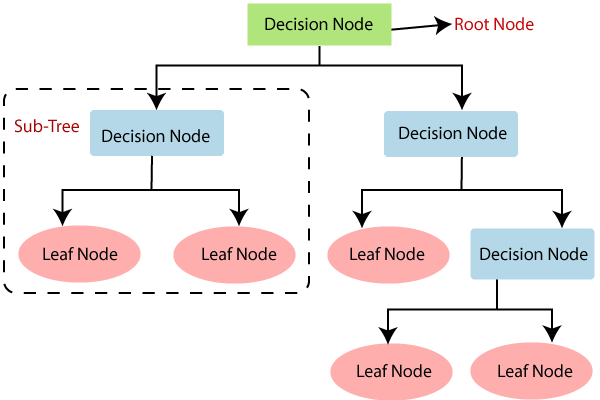

Entropy: Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. Entropy can be calculated as: <br>

Entropy(s)= -P(yes)log2 P(yes)- P(no) log2 P(no) <br>
Where,<br>

S= Total number of samples<br>
P(yes)= probability of yes<br>
P(no)= probability of no<br>

In [19]:
import numpy as np
import pandas as pd

In [20]:
df=pd.read_csv('skill-4-transfusion.data')

In [21]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


STEPS : <br>
Data Pre-processing step <br>
Fitting a Decision-Tree algorithm to the Training set<br>
Predicting the test result<br>
Test accuracy of the result(Creation of Confusion matrix)<br>
Visualizing the test set result.<br>

In [22]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
#Extracting Independent and dependent Variable  
x= df.iloc[:, [2,3]].values  
y= df.iloc[:, 4].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)   

In [23]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [24]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [25]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [26]:
cm

array([[114,  18],
       [ 36,  19]])

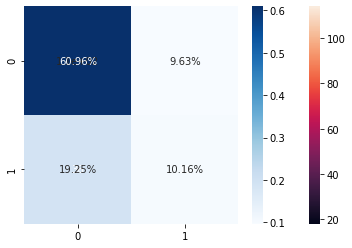

In [27]:
import seaborn as sns
sns.heatmap(cm, annot=True)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [28]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7112299465240641


In [29]:
feature_cols=['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']

In [34]:
#Visualization of decision tree
from sklearn import tree
import matplotlib.pyplot as plt


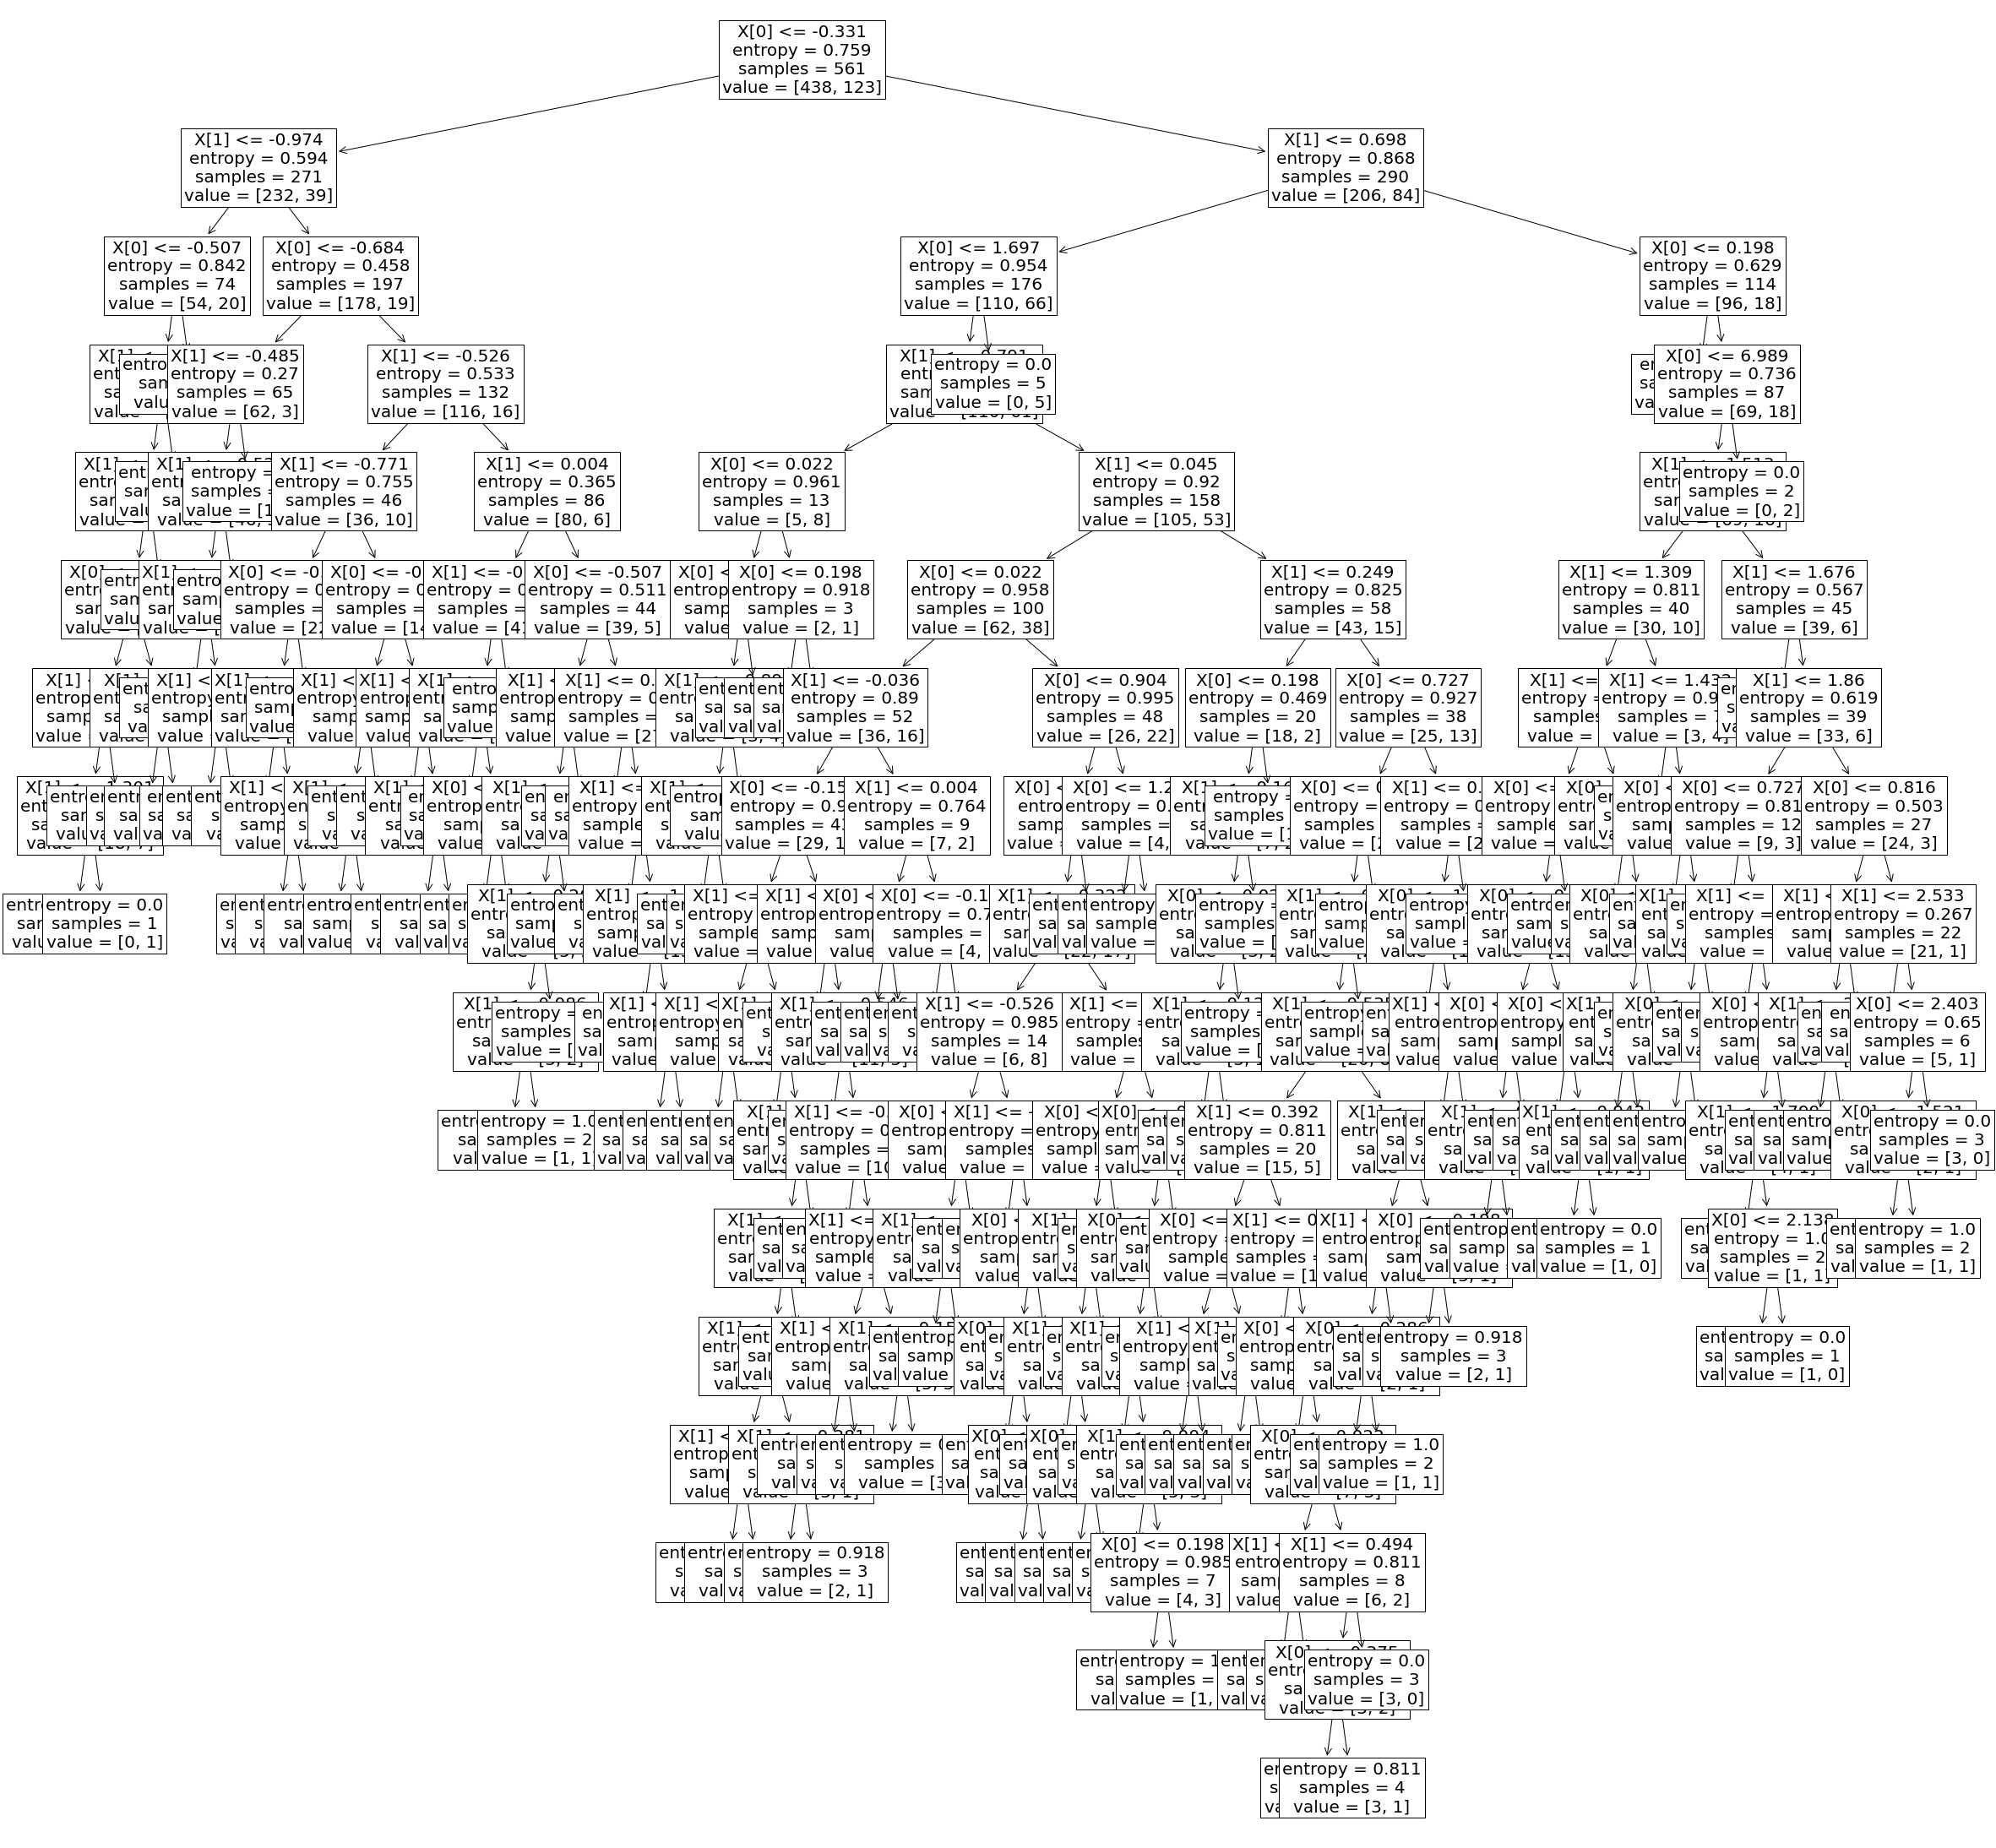

In [35]:
fig, ax = plt.subplots(figsize=(40,40))
tree.plot_tree(classifier,fontsize=20)
plt.show()